In [1]:
import pandas as pd

df_news = pd.read_json("../data/news.json", orient='records')
df_news.head()

,content,annotation,extras,metadata
0,Unions representing workers at Turner Newall...,"{'notes': '', 'label': ['Business']}",NaN,"{'first_done_at': 1521027375000, 'last_updated..."
1,"SPACE.com - TORONTO, Canada -- A second\team o...","{'notes': '', 'label': ['SciTech']}",NaN,"{'first_done_at': 1521027375000, 'last_updated..."
2,AP - A company founded by a chemistry research...,"{'notes': '', 'label': ['SciTech']}",NaN,"{'first_done_at': 1521027375000, 'last_updated..."
3,AP - It's barely dawn when Mike Fitzpatrick st...,"{'notes': '', 'label': ['SciTech']}",NaN,"{'first_done_at': 1521027375000, 'last_updated..."
4,AP - Southern California's smog-fighting agenc...,"{'notes': '', 'label': ['SciTech']}",NaN,"{'first_done_at': 1521027375000, 'last_updated..."


In [2]:
df_news_filtered = pd.DataFrame(columns=["text","label","label_name"])
df_news_filtered["text"] = [item for item in df_news["content"].values]
df_news_filtered["label_name"] = [item["label"][0] for item in df_news["annotation"].values]
df_news_filtered.head()

,text,label,label_name
0,Unions representing workers at Turner Newall...,NaN,Business
1,"SPACE.com - TORONTO, Canada -- A second\team o...",NaN,SciTech
2,AP - A company founded by a chemistry research...,NaN,SciTech
3,AP - It's barely dawn when Mike Fitzpatrick st...,NaN,SciTech
4,AP - Southern California's smog-fighting agenc...,NaN,SciTech


<AxesSubplot:>

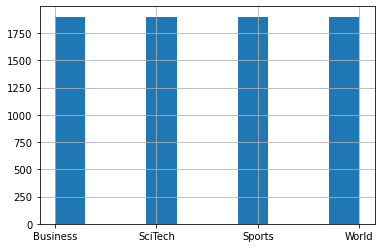

In [3]:
df_news_filtered["label_name"].hist()

In [4]:
label = []
for item in df_news_filtered["label_name"].values:
    if item == "Business":
        label.append(0)
    elif item == "SciTech":
        label.append(1)
    elif item == "Sports":
        label.append(2)
    elif item == "World":
        label.append(3)
    else:
        label.append(0)

df_news_filtered["label"] = label
df_news_filtered.head()

,text,label,label_name
0,Unions representing workers at Turner Newall...,0,Business
1,"SPACE.com - TORONTO, Canada -- A second\team o...",1,SciTech
2,AP - A company founded by a chemistry research...,1,SciTech
3,AP - It's barely dawn when Mike Fitzpatrick st...,1,SciTech
4,AP - Southern California's smog-fighting agenc...,1,SciTech


<AxesSubplot:>

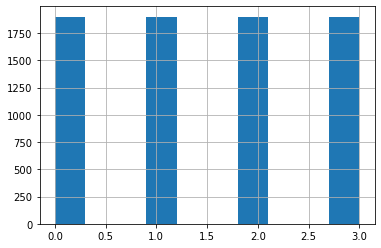

In [5]:
df_news_filtered["label"].hist()

In [6]:
len_df_news_filtered = len(df_news_filtered)
print(len_df_news_filtered)

len_news_train = int(round(len_df_news_filtered * 0.6))
len_news_val_test = (len_df_news_filtered - len_news_train) // 8
len_news_train = len_news_train // 4

print(len_news_train)
print(len_news_val_test)

7600
1140
380


In [7]:
df_news_filtered_0 = df_news_filtered.loc[df_news_filtered['label'] == 0].copy()
df_news_filtered_1 = df_news_filtered.loc[df_news_filtered['label'] == 1].copy()
df_news_filtered_2 = df_news_filtered.loc[df_news_filtered['label'] == 2].copy()
df_news_filtered_3 = df_news_filtered.loc[df_news_filtered['label'] == 3].copy()

df_news_filtered_0_train = df_news_filtered_0[:len_news_train].copy()
df_news_filtered_1_train = df_news_filtered_1[:len_news_train].copy()
df_news_filtered_2_train = df_news_filtered_2[:len_news_train].copy()
df_news_filtered_3_train = df_news_filtered_3[:len_news_train].copy()

df_news_filtered_0_val = df_news_filtered_0[len_news_train:len_news_train+len_news_val_test].copy()
df_news_filtered_1_val = df_news_filtered_1[len_news_train:len_news_train+len_news_val_test].copy()
df_news_filtered_2_val = df_news_filtered_2[len_news_train:len_news_train+len_news_val_test].copy()
df_news_filtered_3_val = df_news_filtered_3[len_news_train:len_news_train+len_news_val_test].copy()

df_news_filtered_0_test = df_news_filtered_0[len_news_train+len_news_val_test:].copy()
df_news_filtered_1_test = df_news_filtered_1[len_news_train+len_news_val_test:].copy()
df_news_filtered_2_test = df_news_filtered_2[len_news_train+len_news_val_test:].copy()
df_news_filtered_3_test = df_news_filtered_3[len_news_train+len_news_val_test:].copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4560 entries, 1076 to 3952
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        4560 non-null   object
 1   label       4560 non-null   int64 
 2   label_name  4560 non-null   object
dtypes: int64(1), object(2)
memory usage: 142.5+ KB


array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

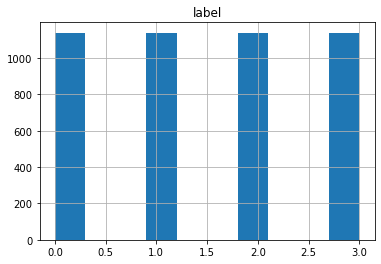

In [8]:
df_news_filtered_train = pd.concat([df_news_filtered_0_train, 
                                    df_news_filtered_1_train, 
                                    df_news_filtered_2_train,
                                    df_news_filtered_3_train])
df_news_filtered_train = df_news_filtered_train.sample(frac=1)
df_news_filtered_train.info()
df_news_filtered_train.hist()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1520 entries, 4912 to 5119
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        1520 non-null   object
 1   label       1520 non-null   int64 
 2   label_name  1520 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.5+ KB


array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

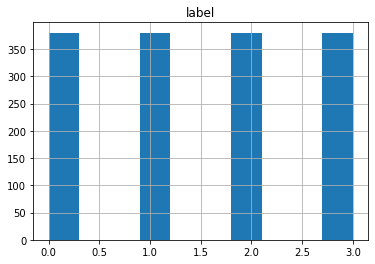

In [9]:
df_news_filtered_val = pd.concat([df_news_filtered_0_val, 
                                    df_news_filtered_1_val, 
                                    df_news_filtered_2_val,
                                    df_news_filtered_3_val])
df_news_filtered_val = df_news_filtered_val.sample(frac=1)
df_news_filtered_val.info()
df_news_filtered_val.hist()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1520 entries, 6497 to 6381
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        1520 non-null   object
 1   label       1520 non-null   int64 
 2   label_name  1520 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.5+ KB


array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

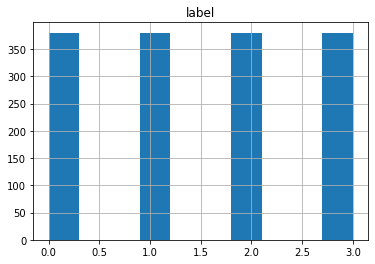

In [10]:
df_news_filtered_test = pd.concat([df_news_filtered_0_test, 
                                    df_news_filtered_1_test, 
                                    df_news_filtered_2_test,
                                    df_news_filtered_3_test])
df_news_filtered_test = df_news_filtered_test.sample(frac=1)
df_news_filtered_test.info()
df_news_filtered_test.hist()

,text,label,label_name
0,Sun Microsystems Inc. plans later this month t...,1,SciTech
1,(WebMD) Eating a diet rich in soy or taking so...,1,SciTech
2,"An American woman, believed to be a civilian, ...",3,World
3,Dan Orlovsky threw for 382 yards and tied his ...,2,Sports
4,Widening its pursuit of Hamas beyond the occup...,3,World


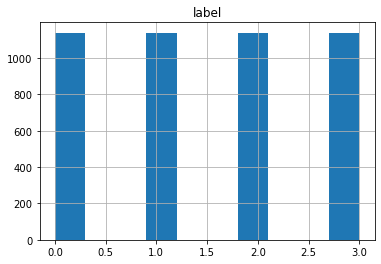

In [11]:
news_train = "../data/news_train.json"
df_news_filtered_train.to_json(news_train, orient="records")
df_readed_news_filtered_train = pd.read_json(news_train, orient='records')
df_readed_news_filtered_train.hist()
df_readed_news_filtered_train.head()

,text,label,label_name
0,"By Raphael Lewis and Benjamin Gedan, Globe Sta...",2,Sports
1,"ALLEN PARK, Mich. - Robert Porcher finally cou...",2,Sports
2,Shares of Google Inc. slipped in pre-market tr...,0,Business
3,Virginia's 10-year experiment with red-light c...,1,SciTech
4,Describing Yasser Arafat as one of the giants ...,3,World


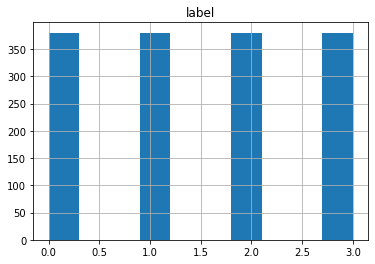

In [12]:
news_val = "../data/news_val.json"
df_news_filtered_val.to_json(news_val, orient="records")
df_readed_news_filtered_val = pd.read_json(news_val, orient='records')
df_readed_news_filtered_val.hist()
df_readed_news_filtered_val.head()

,text,label,label_name
0,A former US Army sergeant who defected to Nort...,3,World
1,"Bob Briggs wifes family has owned about 1,000 ...",0,Business
2,Drug giant Merck pulled its painkiller Vioxx b...,0,Business
3,Little Rock-based Alltel will expand its wirel...,0,Business
4,"In an attempt to become more useful, US resear...",1,SciTech


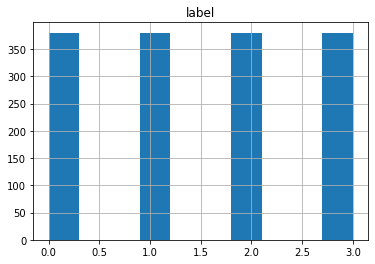

In [13]:
news_test = "../data/news_test.json"
df_news_filtered_test.to_json(news_test, orient="records")
df_readed_news_filtered_test = pd.read_json(news_test, orient='records')
df_readed_news_filtered_test.hist()
df_readed_news_filtered_test.head()